In [5]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
Datos = pd.read_csv('OneDrive/Documentos/Anexo3/heart_cleveland_upload.csv')

In [19]:
Datos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [20]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

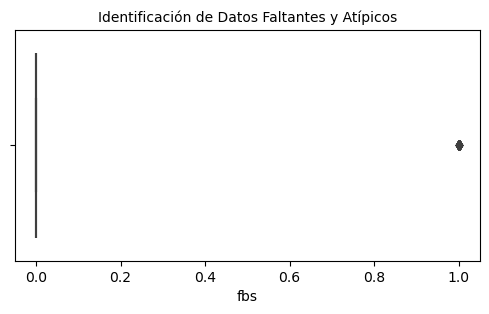

In [21]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

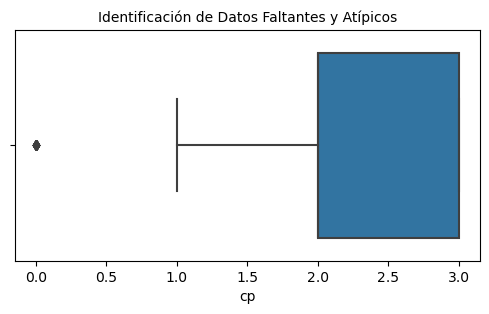

In [22]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

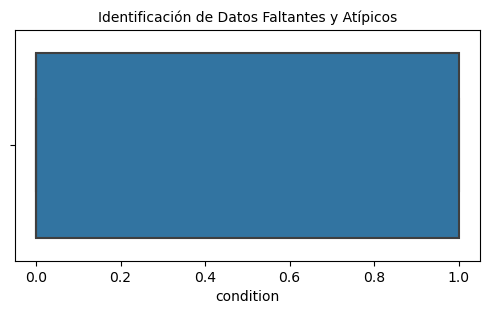

In [23]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

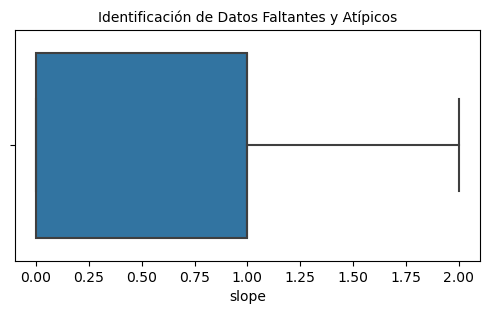

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['slope'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [25]:
print("Cantidad de Registros con cero en Nivel de azucar: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia cardiaca: ",Datos['thalach'].isin([0]).sum())


Cantidad de Registros con cero en Nivel de azucar:  254
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en frecuencia cardiaca:  0


In [26]:
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())

In [27]:
print("Cantidad de Registros con cero en Nivel de azucar: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en frecuencia cardiaca: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de azucar:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en frecuencia cardiaca:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

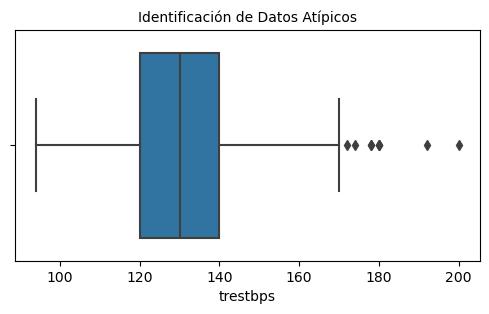

In [30]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [31]:
nivel_minimo=80
nivel_maximo=160
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 15


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

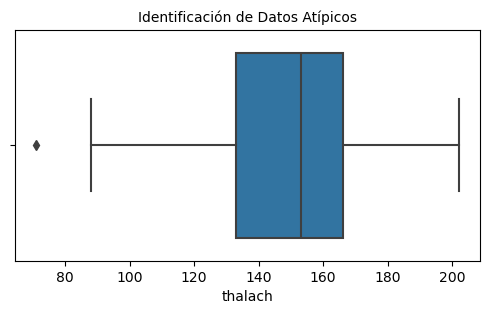

In [32]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [51]:
nivel_minimo=30
nivel_maximo=150
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [39]:

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [40]:
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [41]:
Datos=Datos[(Datos['thalach']<nivel_maximo)&(Datos['thalach']>nivel_minimo)]

In [42]:
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [43]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 4 to 294
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        103 non-null    int64  
 1   sex        103 non-null    int64  
 2   cp         103 non-null    int64  
 3   trestbps   103 non-null    int64  
 4   chol       103 non-null    int64  
 5   fbs        103 non-null    float64
 6   restecg    103 non-null    int64  
 7   thalach    103 non-null    int64  
 8   exang      103 non-null    int64  
 9   oldpeak    103 non-null    float64
 10  slope      103 non-null    int64  
 11  ca         103 non-null    int64  
 12  thal       103 non-null    int64  
 13  condition  103 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 12.1 KB


In [52]:
Datos['condition'].value_counts()

condition
1    69
0    34
Name: count, dtype: int64

In [53]:
X = Datos.drop('condition',axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [54]:
print(X_train)

     age  sex  cp  trestbps  chol       fbs  restecg  thalach  exang  oldpeak  \
228   57    1   3       110   335  0.144781        0      143      1      3.0   
251   53    0   3       130   264  0.144781        2      143      0      0.4   
274   46    1   3       120   249  0.144781        2      144      0      0.8   
122   51    0   2       130   256  0.144781        2      149      0      0.5   
184   63    1   3       140   187  0.144781        2      144      1      4.0   
..   ...  ...  ..       ...   ...       ...      ...      ...    ...      ...   
91    62    0   2       130   263  0.144781        0       97      0      1.2   
214   58    1   3       128   216  0.144781        2      131      1      2.2   
96    59    1   2       126   218  1.000000        0      134      0      2.2   
240   55    1   3       132   353  0.144781        0      132      1      1.2   
95    60    0   2       120   178  1.000000        0       96      0      0.0   

     slope  ca  thal  
228 

In [55]:
print(Y_train) 

228    1
251    0
274    1
122    0
184    1
      ..
91     1
214    1
96     1
240    1
95     0
Name: condition, Length: 77, dtype: int64


In [56]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [57]:
print (Y_test)

183    1
88     0
275    0
208    1
199    1
293    1
264    1
282    1
194    1
157    1
128    1
129    1
156    0
245    1
198    1
174    1
29     0
247    1
227    0
73     0
138    0
4      0
172    0
18     1
217    1
161    1
Name: condition, dtype: int64


In [59]:
print(Prediccion)

[1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1]


In [60]:
print(classification_report(Y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.84      0.94      0.89        17

    accuracy                           0.85        26
   macro avg       0.85      0.80      0.82        26
weighted avg       0.85      0.85      0.84        26



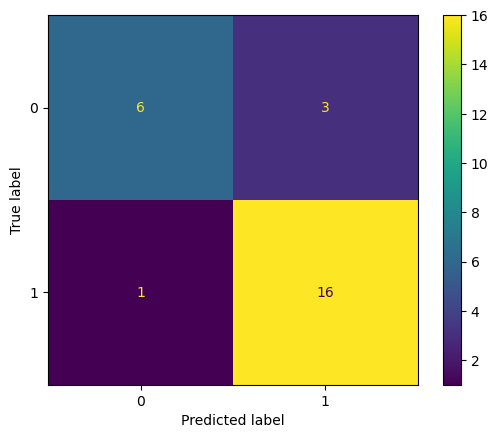

In [61]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

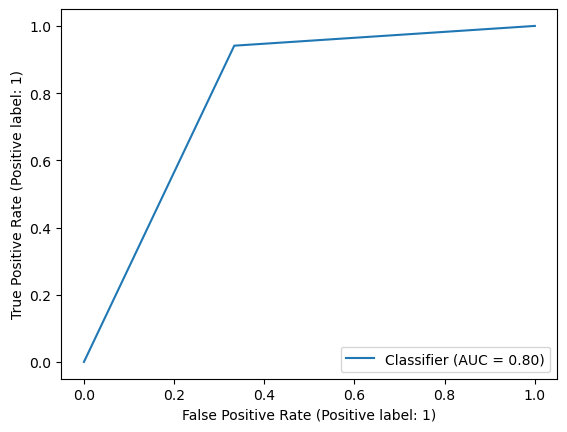

In [62]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()